### Cats vs Dogs - CNN with ImageAugmentation and Dropout to avoid overfitting

In [1]:
import os, shutil

original_dataset_dir = "cats_vs_dogs/train"

dirs = []

base_dir = "cats_vs_dogs_small"
dirs.append(base_dir)

train_dir = os.path.join(base_dir, "train")
dirs.append(train_dir)
validation_dir = os.path.join(base_dir, "validation")
dirs.append(validation_dir)
test_dir = os.path.join(base_dir, "test")
dirs.append(test_dir)

train_cats_dir = os.path.join(train_dir, "cats")
dirs.append(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, "dogs")
dirs.append(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, "cats")
dirs.append(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, "dogs")
dirs.append(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, "cats")
dirs.append(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, "dogs")
dirs.append(test_dogs_dir)

for directory in dirs:
    if not os.path.exists(directory):
       os.mkdir(directory)
    
fnames = ["cat.{}.jpg".format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dest = os.path.join(train_cats_dir, fname)
    shutil.copy(src, dest)

fnames = ["cat.{}.jpg".format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dest = os.path.join(validation_cats_dir, fname)
    shutil.copy(src, dest)

fnames = ["cat.{}.jpg".format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dest = os.path.join(test_cats_dir, fname)
    shutil.copy(src, dest)
   
fnames = ["dog.{}.jpg".format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dest = os.path.join(train_dogs_dir, fname)
    shutil.copy(src, dest)

fnames = ["dog.{}.jpg".format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dest = os.path.join(validation_dogs_dir, fname)
    shutil.copy(src, dest)

fnames = ["dog.{}.jpg".format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dest = os.path.join(test_dogs_dir, fname)
    shutil.copy(src, dest)

for directory in dirs:
    print(directory, ":", len(os.listdir(directory)))
    
print("Done.")

cats_vs_dogs_small : 3
cats_vs_dogs_small/train : 2
cats_vs_dogs_small/validation : 2
cats_vs_dogs_small/test : 2
cats_vs_dogs_small/train/cats : 1000
cats_vs_dogs_small/train/dogs : 1000
cats_vs_dogs_small/validation/cats : 500
cats_vs_dogs_small/validation/dogs : 500
cats_vs_dogs_small/test/cats : 500
cats_vs_dogs_small/test/dogs : 500
Done.


In [7]:
import os, shutil
original_dataset_dir = "cats_vs_dogs/train"

dirs = []

base_dir = "cats_vs_dogs_small"
dirs.append(base_dir)

train_dir = os.path.join(base_dir, "train")
dirs.append(train_dir)
validation_dir = os.path.join(base_dir, "validation")
dirs.append(validation_dir)
test_dir = os.path.join(base_dir, "test")
dirs.append(test_dir)

train_cats_dir = os.path.join(train_dir, "cats")
dirs.append(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, "dogs")
dirs.append(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, "cats")
dirs.append(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, "dogs")
dirs.append(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, "cats")
dirs.append(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, "dogs")
dirs.append(test_dogs_dir)

In [1]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(
    32, (3, 3), 
    activation="relu", 
    input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())

model.add(layers.Dropout(0.5))

model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

model.summary()

model.compile(
    optimizer=optimizers.RMSprop(lr=1e-4),
    loss="binary_crossentropy",
    metrics=["acc"]
)

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [9]:
## data generator: something that grabs something from somewhere: does data yield from dataset and rescaling
from keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=40, #Data augmentation
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
) 

validation_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(
                train_dir, #directory of the training set, with a subfolder for each class (here cats and dogs)
                target_size=(150,150),
                batch_size=20,
                class_mode="binary")

validation_generator=validation_datagen.flow_from_directory(
                    validation_dir,
                    target_size=(150,150),
                    batch_size=20,
                    class_mode="binary")

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [10]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=30,
        validation_data=validation_generator,
        validation_steps=50
)

Epoch 1/30
100/100 [==============================] - 63s 633ms/step - loss: 0.6934 - acc: 0.5165 - val_loss: 0.6882 - val_acc: 0.5000
Epoch 2/30
100/100 [==============================] - 68s 683ms/step - loss: 0.6822 - acc: 0.5600 - val_loss: 0.6723 - val_acc: 0.5870
Epoch 3/30
100/100 [==============================] - 66s 659ms/step - loss: 0.6770 - acc: 0.5750 - val_loss: 0.6572 - val_acc: 0.6080
Epoch 4/30
100/100 [==============================] - 66s 662ms/step - loss: 0.6615 - acc: 0.5900 - val_loss: 0.6431 - val_acc: 0.6110
Epoch 5/30
100/100 [==============================] - 66s 657ms/step - loss: 0.6529 - acc: 0.6135 - val_loss: 0.6370 - val_acc: 0.6470
Epoch 6/30
100/100 [==============================] - 93s 931ms/step - loss: 0.6275 - acc: 0.6470 - val_loss: 0.6304 - val_acc: 0.6320
Epoch 7/30
100/100 [==============================] - 71s 709ms/step - loss: 0.6248 - acc: 0.6510 - val_loss: 0.5977 - val_acc: 0.6770
Epoch 8/30
100/100 [==============================] - 6

In [11]:
print(history.history)

{'val_loss': [0.6882337343692779, 0.6723419547080993, 0.6571926164627075, 0.6430758821964264, 0.6369951486587524, 0.6303880286216735, 0.5976642870903015, 0.6396688014268875, 0.5793137794733048, 0.6538302052021027, 0.579148845076561, 0.5843131428956986, 0.5746945536136627, 0.5308331316709518, 0.5361846148967743, 0.5354888951778412, 0.514652606844902, 0.5135642349720001, 0.5239203864336014, 0.6017630666494369, 0.5046993052959442, 0.5086531865596772, 0.5249095886945725, 0.4934757298231125, 0.5487116032838821, 0.4844318151473999, 0.6296585482358933, 0.5034447479248046, 0.5350673443078995, 0.5411455619335175], 'val_acc': [0.5000000017881393, 0.5870000034570694, 0.6080000007152557, 0.6110000032186508, 0.6470000010728836, 0.6319999986886978, 0.6769999992847443, 0.6139999997615814, 0.6839999955892563, 0.6419999986886978, 0.6910000002384186, 0.6880000025033951, 0.6870000034570694, 0.7259999978542327, 0.719000004529953, 0.7300000011920929, 0.74, 0.7499999988079071, 0.7360000026226043, 0.67199999

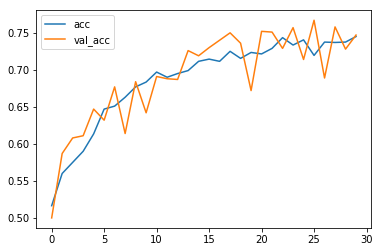

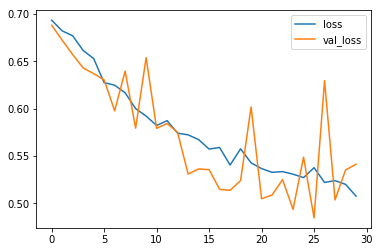

In [15]:
import matplotlib.pyplot as plt

def plot_history(history):
    plt.plot(history["acc"], label="acc")
    plt.plot(history["val_acc"], label="val_acc")
    plt.legend()
    plt.show()
    plt.close()
    
    plt.plot(history["loss"], label="loss")
    plt.plot(history["val_loss"], label="val_loss")
    plt.legend()
    plt.show()
    plt.close()

plot_history(history.history)